# Supplementary figure 4. SRSF3 induces alternative processing and prevents nick processing
A. Conservation of mir-142 CNNC   
B. Conservation of mir-17 CNNC  
C. TCGA analysis

In [1]:
import time
today = time.strftime('%Y-%m-%d')
name = 'Seungchan Baek'
print 'Last revised by %s at %s.' % (name, today)

Last revised by Seungchan Baek at 2020-10-13.


In [2]:
home = '/casa/bsc/projects/1_DCS/2004_paper_prep/'
%cd $home

/casa/bsc/projects/1_DCS/2004_paper_prep


In [3]:
from __future__ import division
import sys; sys.path.append('/casa/bsc/notebooks/')
from util import *
from basic import gen_result_dir
resultpath = gen_result_dir('results/')
print 'resultpath:', resultpath

resultpath: results/201013/


In [4]:
import pandas as pd
import numpy as np
import re
import gzip
from matplotlib import pyplot as plt
from matplotlib import gridspec, lines
from scipy.stats import rankdata, spearmanr, sem, pearsonr
from os import listdir
%matplotlib inline

In [5]:
LIBRARIES = [ 'set1', 'set2', 'set3', 'set4', 'set5' ]

#### Import supplementary tables

In [6]:
s1 = pd.read_csv('supplementary/201012_s1_pri-info.csv', header=1, index_col=0)
s2 = pd.read_csv('supplementary/201012_s2_pri-construct.csv', header=1, index_col=0)
print 's1:\t%s'%', '.join(list(s1.columns))
print 's2:\t%s'%', '.join(list(s2.columns)[:6])

s1:	5p mature, 5p sequence, 3p mature, 3p sequence, Note
s2:	Chr, Start, End, Strand, Construct sequence, 100way phyloP scores (pre-miRNA -/+ 100nt)


In [7]:
constseqs = dict(s2['Construct sequence'])
print len(constseqs)

1881


In [8]:
phypris = {}
for pri in ['hsa-mir-142','hsa-mir-17']:
    phypri = s2.loc[pri, '100way phyloP scores (pre-miRNA -/+ 100nt)'][1:-1]
    phypri = map(float, phypri.split(', '))
    phypris[pri] = phypri

In [9]:
def mirbase_to_relative_pos(mir, c5, c3):
    ps, pe, strand = s2.loc[mir, ['Start','End','Strand']]
    if strand=='+':
        return c5-ps+1, c3-ps+1
    return pe-c3+1, pe-c5+1

# A. Conservation of mir-142 CNNC

In [10]:
window = 30
mir = 'hsa-mir-142'

In [11]:
ch, st, en, strand = get_pre_annot(mir)
rst, ren = mirbase_to_relative_pos(mir, st, en)
f3seq = constseqs[mir][ren:]
cnncpos = [ s.start() for s in re.finditer(r'(?=C[A-Z][A-Z]C)', f3seq) ]
print cnncpos

[15, 27, 29]


In [12]:
cnncpos = 15
colors = ['#ababab']*window
for pos in range(cnncpos,cnncpos+4):
    colors[pos] = '#d95f02'
xs = range(window)
ys = phypris[mir][-100:-100+window]
width = .7
lw = 1
xmin, xmax = -1, window-.5
ymax = max(ys)

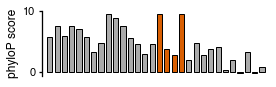

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4,1.2))
ax.bar(xs, ys, color=colors, width=width, lw=lw, edgecolor='k')

ax.set_xlim(xmin, xmax)
ax.set_xticks([])
ax.set_ylabel('phyloP score', fontsize=12)
ax.spines['bottom'].set_visible(False)
#fig.savefig(resultpath + '200609_s4a_cnnc_mir142_tmp.pdf')

# C. Conservation of mir-17 CNNC

In [15]:
window = 30
mir = 'hsa-mir-17'

In [16]:
ch, st, en, strand = get_pre_annot(mir)
rst, ren = mirbase_to_relative_pos(mir, st, en)
f3seq = constseqs[mir][ren:]
cnncpos = [ s.start() for s in re.finditer('C[A-Z][A-Z]C', f3seq) ]
print cnncpos

[11, 17]


In [17]:
cnncpos = 17
colors = ['#ababab']*window
for pos in range(cnncpos,cnncpos+4):
    colors[pos] = '#d95f02'
xs = range(window)
ys = phypris[mir][-100:-100+window]
width = .7
lw = 1
xmin, xmax = -1, window-.5
ymax = max(ys)

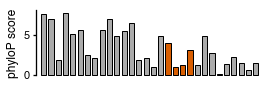

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4,1.2))
ax.bar(xs, ys, color=colors, width=width, lw=lw, edgecolor='k')

ax.set_xlim(xmin, xmax)
ax.set_ylim(-.1,int(ymax)+1)
ax.set_xticks([])
ax.set_ylabel('phyloP score', fontsize=12)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_bounds(0, int(ymax)+1)
#fig.savefig(resultpath + '200609_s4a_cnnc_mir142_tmp.pdf')

# D. SRSF3-miRNA associations from TCGA data

In [21]:
rcutoff = 20
ncancer = 10
nmirs = 200

In [22]:
tcgapath = 'supplementary/TCGA'
cancers = [ fo for fo in listdir(tcgapath) if not fo.startswith('.') ]
print len(cancers)

32


In [23]:
exptbls = {}
for cancer in cancers:
    fname = [ f for f in listdir('%s/%s'%(tcgapath,cancer)) if f.endswith('uq') ][0]
    tbl = pd.read_table('%s/%s/%s'%(tcgapath, cancer, fname), index_col=0)
    tbl.index = [ i.split('|')[0] for i in tbl.index ]
    exptbls[cancer] = tbl

In [24]:
exptbls['acc'].iloc[:3,:5]

,TCGA-OR-A5JA,TCGA-OR-A5J8,TCGA-P6-A5OF,TCGA-OR-A5KY,TCGA-OR-A5J2
hsa-let-7a-2-3p,1.220924,18.821130,1.490880,5.130637,11.001915
hsa-let-7a-3p,61.938421,128.709081,54.603492,122.202445,110.125961
hsa-let-7a-5p,8644.111665,19745.914013,42408.960445,36843.518996,20807.219702


In [25]:
def get_corrs(protein, rcutoff):
    tblr, tblp = pd.DataFrame(), pd.DataFrame()
    for cancer in cancers:
        exps = exptbls[cancer]
        if protein not in exps.index:
            continue
        mats = [ m for m in exps.index if m.startswith('hsa-') and ' ' not in m ]
        robust = sorted(mats, key=lambda x: np.average(exps.loc[x]))[-nmirs:]
        for m in robust:
            r, p = spearmanr(exps.loc[protein], exps.loc[m])
            tblr.loc[m, cancer] = r
            tblp.loc[m, cancer] = p
    return tblr, tblp

In [26]:
proteins = [ 'SFRS3' ]#, 'ERH', 'SAFB2', 'LIN28B' ]
corrtbls = {}
for p in proteins:
    tr = get_corrs(p, rcutoff)[0]
    tr = tr[tr.apply(lambda x: len(x.dropna())>=ncancer, axis=1)]
    tr['average'] = tr.mean(axis=1)
    tr['sem'] = tr.apply(lambda x: sem(x.dropna()[:-1]), axis=1)
    corrtbls[p] = tr.sort_values('average')

#### SRSF3

In [27]:
protein = 'SFRS3'
print corrtbls[protein].index[-10:]

Index([u'hsa-miR-25-3p', u'hsa-miR-17-3p', u'hsa-miR-93-5p', u'hsa-miR-92a-3p',
       u'hsa-miR-106b-5p', u'hsa-miR-15b-3p', u'hsa-miR-19a-3p',
       u'hsa-miR-19b-3p', u'hsa-miR-20a-5p', u'hsa-miR-17-5p'],
      dtype='object')


In [30]:
title = 'SRSF3'
ys = corrtbls[protein]['average'].tolist()
xs = range(len(ys))
yerrs = corrtbls[protein]['sem'].tolist()
xmin, xmax = -5, len(xs)+1
ymin, ymax = -max(map(abs, ys))-.01, max(map(abs, ys))+.01
lw = 1.8
s = 10
color = 'black'
zoom = 10
zoomwhich = 'top'
colors = ['black','tab:red'] + ['black']*7 + ['tab:red']
txts = [ m.replace('hsa-miR-','') for m in corrtbls[protein].index[-zoom:] ]

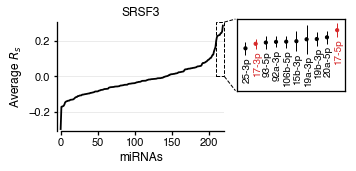

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(3,2))
ax.plot(xs, ys, lw=lw, c=color)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('miRNAs', fontsize=12)
ax.set_ylabel(r'Average $R_s$', fontsize=12)
ax.spines['bottom'].set_bounds(0, len(ys))
ax.set_title(title, fontsize=12)
gr = plt.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, fc='w'); ax.add_patch(gr)
ax.yaxis.grid(ls='-', lw=.5, clip_path=gr)

if zoomwhich=='top':
    ymid, ymin2, ymax2 = 0, 0, max(np.array(ys[-zoom:])+np.array(yerrs[-zoom:]))+.02
    sq = plt.Rectangle((len(xs)-zoom,ymid), zoom+1, ymax-ymid, lw=1, ls='--', 
                       edgecolor='k', facecolor='None')
    l1 = lines.Line2D([xmax,xmax+15], [ymid,-.08], lw=1, ls='--', color='k')
    l2 = lines.Line2D([xmax,xmax+15], [ymax,ymax+.017], lw=1, ls='--', color='k')
    ax2loc = [.96, .4, .5, .5]
    yzoom = ys[-zoom:]
    ezoom = yerrs[-zoom:]
    
else: # bottom
    ymid, ymin2, ymax2 = ys[zoom], ymin, ys[zoom]
    sq = plt.Rectangle((-1,ymid), zoom+1, ymin-ymid-.01, lw=1, ls='--', 
                       edgecolor='k', color='None')
    l1 = lines.Line2D([zoom,xmax+16], [ymid,0], lw=1, color='k', ls='--')
    l2 = lines.Line2D([zoom,xmax+16], [ymin,ymin], lw=1, color='k', ls='--')
    ax2loc = [.96, .14, .5, .5]
    yzoom = ys[:zoom]
    ezoom = ys[:zoom]
       
sq.set_clip_on(False); ax.add_patch(sq); sq.set_zorder(3)
l1.set_clip_on(False); ax.add_line(l1)
l2.set_clip_on(False); ax.add_line(l2)

ax2 = fig.add_axes(ax2loc, ax)
ax2.scatter(range(zoom), yzoom, s=s, color=colors)
ax2.errorbar(range(zoom), yzoom, yerr=ezoom, lw=0, elinewidth=1, ecolor=colors)
ax2.set_xlim(-.8, zoom-.2)
ax2.set_ylim(ymin2, ymax2)
ax2.set_xticks([])
ax2.set_yticks([])

if zoomwhich=='top':
    ax2.spines['top'].set_visible(True)
    ax2.spines['right'].set_visible(True)
    for i, mir, y, c, err in zip(range(zoom), txts, yzoom, colors, ezoom):
        ax2.text(i-.3, y-err-.01, mir, fontsize=10, rotation=90, va='top', color=c)
else:
    for i, mir, y, c, err in zip(range(zoom), txts, yzoom, colors, ezoom):
        ax2.text(i-.3, y+err+.01, mir, fontsize=10, rotation=90, va='bottom', color=c)
#fig.savefig(resultpath + '200617_s4_tcga_%s.pdf'%title)